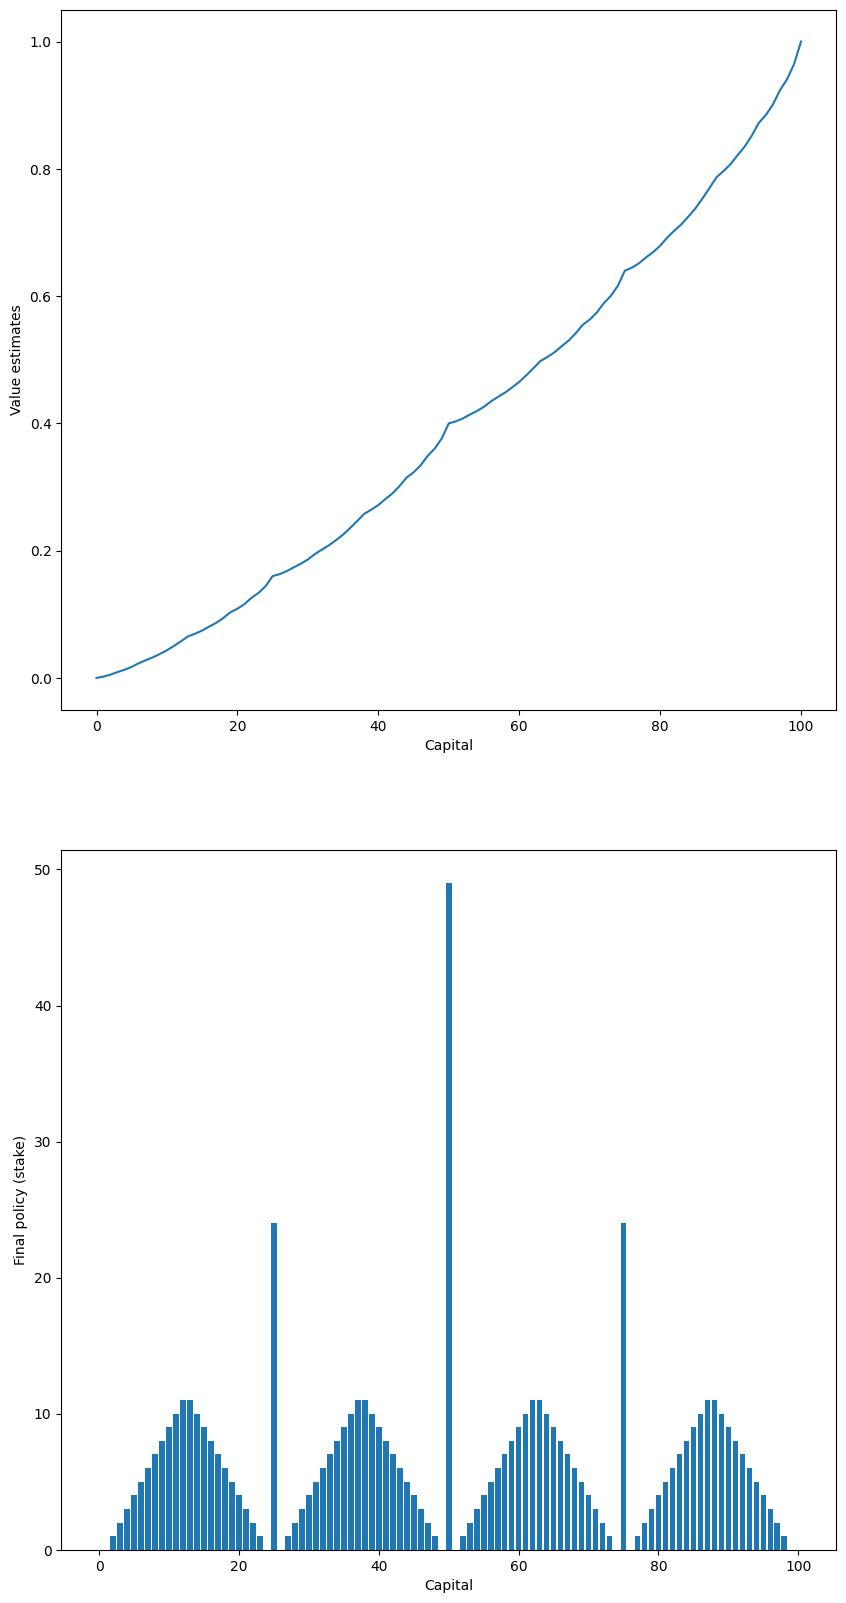

In [1]:
import numpy as np
import matplotlib.pyplot as plt

goal = 100

states = np.arange(goal + 1)

# assume the head probability is 0.4
p_head = 0.4


def plot_results(state_values, policy):
    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    plt.plot(state_values)
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')

    plt.subplot(2, 1, 2)
    plt.bar(states, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

    plt.show()


def main():
    # initialise state values
    state_values = np.zeros(goal + 1)
    state_values[goal] = 1.0
    policy = np.zeros(goal + 1)
    theta = 1e-8

    # Policy evaluation
    while True:
        delta = 0.0

        for s in states[1: goal]:
            actions = np.arange(min(s, goal - s) + 1)

            actions_returns = []

            for a in actions:
                actions_returns.append(p_head * state_values[s + a] + (1. - p_head) * state_values[s - a])
            # optimal value function
            new_value = np.max(actions_returns)

            delta = np.maximum(delta, np.abs(state_values[s] - new_value))

            state_values[s] = new_value

        if delta < theta:
            break

    # Policy improvement
    for s in states[1: goal]:

        actions = np.arange(min(s, goal - s) + 1)

        actions_returns = []

        for a in actions:
            actions_returns.append(p_head * state_values[s + a] + (1. - p_head) * state_values[s - a])

        # round to resemble the figure in the book
        policy[s] = actions[np.argmax(np.round(actions_returns[1: goal], 5))]

    plot_results(state_values, policy)


if __name__ == '__main__':
    main()